In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/sample_data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [6]:
df.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

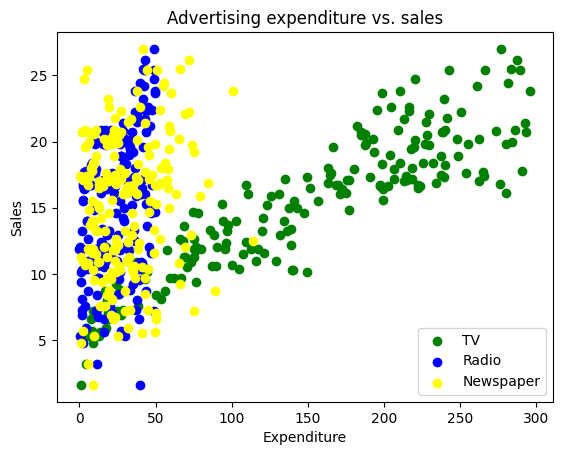

In [19]:
plt.scatter(df['TV'],df['Sales'],c='green', label='TV')
plt.scatter(df['Radio'],df['Sales'],c='blue', label='Radio')
plt.scatter(df['Newspaper'],df['Sales'],c='yellow',label='Newspaper')
plt.xlabel("Expenditure")
plt.ylabel("Sales")
plt.legend()
plt.title('Advertising expenditure vs. sales')
plt.show()

In [20]:
a=df.drop('Sales',axis=1)
b=df['Sales']

In [21]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test=train_test_split(a, b, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(a_train, b_train)

LinearRegression()

In [24]:
print('coefficients:')
list(zip(a,model.coef_))

coefficients:


[('TV', 0.05358869132706914),
 ('Radio', 0.10270676778771287),
 ('Newspaper', 0.007931667677316324)]

In [28]:
b_pred=model.predict(a_test)
print("Prediction:",format(b_pred))

Prediction: [17.15991908 20.53369503 23.68914396  9.5191455  21.60736836 12.78101318
 21.08636345  8.76054246 17.11499951 16.68789636  8.97584663  8.57645026
 18.33212325  8.17863567 12.64605571 14.94486946  8.34939536 17.83858948
 11.12172174 20.37740648 20.9483297  13.04035779 11.01360656 22.51142595
  9.40369784  7.98591291 20.86943368 13.77882255 10.83407064  8.00419229
 15.88597618 10.7027424  20.9521718  10.84679243 21.50720813 21.07347295
 12.22673775 22.85273767 12.57698182  6.54597206 11.93411853 15.23490068
 10.07411153  9.52159696 17.11786382  7.28032677 10.49404864 15.24356754
 11.20742176 11.78392665 14.01472163 14.59884572 10.82722434  9.55839415
  9.03749681 12.51183313 10.52551021 25.01900824  7.99334943 15.73916263]


In [29]:
model_dif=pd.DataFrame({"model":b_test, "coe":b_pred})
model_dif.head()

,model,coe
95,16.9,17.159919
15,22.4,20.533695
30,21.4,23.689144
158,7.3,9.519146
128,24.7,21.607368


In [31]:
from sklearn.metrics import r2_score
r2_score(b_test, b_pred)

0.9091484341849799